In [ ]:
import pandas as pd
import glob

files = glob.glob("/content/thrissur/thrissur 12/*.csv")

df_list = []

for file in files:
    df = pd.read_csv(file)

    df_wide = df.pivot_table(
        index=["datetime", "location_id", "lat", "lon"],
        columns="parameter",
        values="value"
    ).reset_index()

    df_wide["city"] = "Thrissur"
    df_list.append(df_wide)

final_df = pd.concat(df_list, ignore_index=True)


final_df.to_csv("Thrissur_12.csv", index=False)

In [40]:
import os
import pandas as pd
import numpy as np

In [55]:
df = (
    pd.read_csv(r"C:\Users\Fahad\Desktop\my works\Java AP project\AQI-Risk-Assessment\ml\Kollam.csv")
    .replace('', pd.NA)
    .dropna(subset=['pm10', 'pm25'])
    .query("pm10 != 0 and pm25 != 0")
)


In [57]:
df = df[
    (df['pm10'] > 0) &   # remove 0 or negative PM10
    (df['pm25'] > 0)    # remove 0 or negative PM2.5
]


In [58]:
print(df[['pm10', 'pm25']].describe())


               pm10          pm25
count  18033.000000  18033.000000
mean      79.823150     44.749760
std      146.208919    147.317724
min        4.310000      0.060000
25%       51.230000     14.990000
50%       65.920000     25.850000
75%       79.110000     33.790000
max     2181.060000   2158.560000


In [59]:
df.to_csv("kollam.csv", index=False)

In [47]:
import pandas as pd
import glob
import os

# Path to the folder containing CSV files
folder_path = r"C:\Users\Fahad\Desktop\my works\Java AP project\AQI-Risk-Assessment\ml\data\processed\Thrissur"

# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and combine
df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save combined CSV
combined_df.to_csv("thrissur.csv", index=False)

print(f"Combined {len(csv_files)} CSV files into thrissur.csv")


Combined 12 CSV files into thrissur.csv


In [50]:
combined_df = (
    pd.read_csv(r"C:\Users\Fahad\Desktop\my works\Java AP project\AQI-Risk-Assessment\ml\notebook\thrissur.csv")
    .replace('', pd.NA)
    .dropna(subset=['pm10', 'pm25'])
    .query("pm10 != 0 and pm25 != 0")
)


In [52]:
print(combined_df[['pm10', 'pm25']].describe())

               pm10          pm25
count  23350.000000  23350.000000
mean      55.057024     29.716684
std        9.307742      5.792207
min       22.720000      9.680000
25%       48.380000     26.260000
50%       53.730000     29.700000
75%       60.690000     32.560000
max      175.040000    116.610000


In [90]:
combined_df.to_csv("Thrissur.csv", index=False)

In [91]:
combined_df = (
    pd.read_csv(r"C:\Users\Fahad\Desktop\my works\Java AP project\AQI-Risk-Assessment\ml\Ernakulam.csv")
    .replace('', pd.NA)
    .dropna(subset=['pm10', 'pm25'])
    .query("pm10 != 0 and pm25 != 0")
)


In [96]:
combined_df = combined_df[
    (combined_df['pm10'] > 0) &   # remove 0 or negative PM10
    (combined_df['pm25'] > 0) &
    (combined_df['pm25'] <2000)# remove 0 or negative PM2.5
]


In [97]:
print(combined_df[['pm10', 'pm25']].describe())

               pm10          pm25
count  20398.000000  20398.000000
mean      53.115183     37.885409
std       24.400606     24.406719
min       36.890000     22.070000
25%       43.040000     27.810000
50%       49.000000     33.770000
75%       57.757500     42.520000
max     1532.310000   1517.080000


In [100]:
combined_df.to_csv("Ernakulam.csv", index=False)

In [77]:


parent_folder = r"C:\Users\Fahad\Desktop\my works\Java AP project\AQI-Risk-Assessment\ml\data\raw\trivandrum_kariyavattom"

# Find all .csv.gz files recursively
all_files = glob.glob(
    os.path.join(parent_folder, "**", "*.csv.gz"),
    recursive=True
)

print(f"Found {len(all_files)} files")

# Read and combine
df_list = []
for file in all_files:
    df = pd.read_csv(file, compression="gzip")
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

combined_df = combined_df.drop(['sensors_id','units'], axis=1)

# Save final combined CSV
combined_df.to_csv("combined_12_months.csv", index=False)

print("All months combined into combined_12_months.csv")


Found 310 files
All months combined into combined_12_months.csv


In [104]:
df = pd.read_csv("combined_12_months.csv")

df_wide = df.pivot_table(
    index=["datetime","location","lat","lon"],        # or ['date', 'station', 'city'] if present
    columns="parameter",
    values="value",
    aggfunc="mean"              # important if duplicates exist
).reset_index()

# Remove column index name
df_wide.columns.name = None

df_wide.to_csv("combined_12_months_wide.csv", index=False)

In [105]:
combined_df = (
    pd.read_csv(r"C:\Users\Fahad\Desktop\my works\Java AP project\AQI-Risk-Assessment\ml\notebook\combined_12_months_wide.csv")
    .replace('', pd.NA)
    .dropna(subset=['pm10', 'pm25'])
    .query("pm10 != 0 and pm25 != 0")
)


In [106]:
combined_df = combined_df[
    (combined_df['pm10'] > 0) &   # remove 0 or negative PM10
    (combined_df['pm25'] > 0)    # remove 0 or negative PM2.5
]


In [107]:
print(combined_df[['pm10', 'pm25']].describe())

               pm10          pm25
count  24488.000000  24488.000000
mean      64.673498     31.952655
std       20.513721     23.781074
min        2.050000      1.000000
25%       56.257500     22.030000
50%       63.640000     25.460000
75%       70.072500     28.980000
max      756.320000    684.530000


In [109]:
combined_df['city'] = "kariavattom"
combined_df.to_csv("tvm_kariavattom.csv", index=False)

In [84]:
combined_df = (
    pd.read_csv(r"C:\Users\Fahad\Desktop\my works\Java AP project\AQI-Risk-Assessment\ml\Kannur.csv")
    .replace('', pd.NA)
    .dropna(subset=['pm10', 'pm25'])
    .query("pm10 != 0 and pm25 != 0")
)


In [85]:
combined_df = combined_df[
    (combined_df['pm10'] > 0) &   # remove 0 or negative PM10
    (combined_df['pm25'] > 0)    # remove 0 or negative PM2.5
]


In [86]:
print(combined_df[['pm10', 'pm25']].describe())


               pm10          pm25
count  21577.000000  21577.000000
mean      60.689019     31.756791
std       16.866877      5.627841
min       24.470000     20.200000
25%       55.840000     28.590000
50%       58.460000     30.960000
75%       62.540000     33.400000
max      669.910000     72.660000


In [87]:
combined_df.to_csv("Kannur.csv", index=False)

In [101]:
combined_df = (
    pd.read_csv(r"C:\Users\Fahad\Desktop\my works\Java AP project\AQI-Risk-Assessment\ml\Trivandrum.csv")
    .replace('', pd.NA)
    .dropna(subset=['pm10', 'pm25'])
    .query("pm10 != 0 and pm25 != 0")
)

In [102]:
print(combined_df[['pm10', 'pm25']].describe())

               pm10          pm25
count  20064.000000  20064.000000
mean      47.847239     22.394537
std       36.042026     18.783194
min        2.000000      1.000000
25%       23.000000     11.000000
50%       41.000000     19.000000
75%       64.000000     29.000000
max      636.000000    333.000000


In [103]:
combined_df.to_csv("Trivandrum.csv", index=False)

In [110]:
folder_path = r"C:\Users\Fahad\Desktop\my works\Java AP project\AQI-Risk-Assessment\ml"

# Get all CSV files
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

print(f"Found {len(csv_files)} CSV files")

# Read and combine
df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save combined CSV
combined_df.to_csv("kerala.csv", index=False)

print("Combined CSV created: combined_6_files.csv")

Found 6 CSV files
Combined CSV created: combined_6_files.csv


In [112]:
df = pd.read_csv('kerala.csv')
column_names = df.columns.tolist()
print(column_names)

['datetime', 'location_id', 'lat', 'lon', 'location', 'co', 'no', 'no2', 'nox', 'o3', 'pm10', 'pm25', 'relativehumidity', 'so2', 'temperature', 'wind_direction', 'wind_speed', 'city', 'aqi', 'date', 'time', 'hour', 'dayofweek', 'month', 'is_weekend', 'aqi_lag_1', 'aqi_lag_6', 'aqi_lag_24', 'pm25_lag_1', 'pm25_lag_6', 'pm25_lag_24', 'pm10_lag_1', 'pm10_lag_6', 'pm10_lag_24', 'no2_lag_1', 'no2_lag_6', 'no2_lag_24', 'o3_lag_1', 'o3_lag_6', 'o3_lag_24', 'co_lag_1', 'co_lag_6', 'co_lag_24', 'aqi_rollmean_6', 'aqi_rollmean_24', 'pm25_rollmean_6', 'pm25_rollmean_24', 'pm10_rollmean_6', 'pm10_rollmean_24', 'target_aqi_next_day']


C:\Users\Fahad\AppData\Local\Temp\ipykernel_25060\522379236.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kerala.csv')


In [2]:
import pandas as pd
import numpy as np

# 1. Load data
df = pd.read_csv('kerala_test.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

# 2. Resample to Hourly (Fixing the 'h' and 'include_groups' warnings)
# 'h' is the new standard for hourly frequency
df_hourly = (
    df.groupby('city')
    .resample('h', on='datetime')
    .mean(numeric_only=True)
    .reset_index()
)

# 3. Clean City Names
df_hourly['city'] = df_hourly['city'].str.title().replace('Kariavattom', 'Trivandrum-Kariavattom')

# 4. Fill gaps using interpolation (limit to 3 hours to avoid filling huge gaps with fake data)
pollutants = ['pm25', 'pm10', 'co', 'no2', 'so2', 'o3']
for p in pollutants:
    df_hourly[p] = df_hourly.groupby('city')[p].transform(lambda x: x.interpolate(method='linear', limit=3))

# ---------------------------------------------------------
# 5. INDIAN AQI CALCULATION LOGIC
# ---------------------------------------------------------
def get_pm25_subindex(x):
    if x <= 30: return x * 50 / 30
    elif x <= 60: return 50 + (x - 30) * 50 / 30
    elif x <= 90: return 100 + (x - 60) * 100 / 30
    elif x <= 120: return 200 + (x - 90) * 100 / 30
    elif x <= 250: return 300 + (x - 120) * 100 / 130
    elif x > 250: return 400 + (x - 250) * 100 / 130
    else: return 0

def get_pm10_subindex(x):
    if x <= 50: return x
    elif x <= 100: return x
    elif x <= 250: return 100 + (x - 100) * 100 / 150
    elif x <= 350: return 200 + (x - 250) * 100 / 100
    elif x <= 430: return 300 + (x - 350) * 100 / 80
    elif x > 430: return 400 + (x - 430) * 100 / 80
    else: return 0

# (Note: You can add sub-indices for SO2, NO2, CO similarly)

# Calculate Sub-Indices
df_hourly['si_pm25'] = df_hourly['pm25'].apply(get_pm25_subindex)
df_hourly['si_pm10'] = df_hourly['pm10'].apply(get_pm10_subindex)

# The final AQI is the maximum of the sub-indices
df_hourly['AQI'] = df_hourly[['si_pm25', 'si_pm10']].max(axis=1)

# 6. Create the "Target" (Next Hour AQI)
# This is what your ML model will try to predict
df_hourly['target_next_hour_aqi'] = df_hourly.groupby('city')['AQI'].shift(-1)

# Drop rows where we don't have a target (the last hour of each city)
df_final = df_hourly.dropna(subset=['target_next_hour_aqi'])

print(df_final[['datetime', 'city', 'AQI', 'target_next_hour_aqi']].head())

C:\Users\Fahad\AppData\Local\Temp\ipykernel_28756\660911373.py:13: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .mean(numeric_only=True)


                   datetime       city        AQI  target_next_hour_aqi
0 2025-02-19 01:00:00+05:30  Ernakulam  84.600000             95.016667
1 2025-02-19 02:00:00+05:30  Ernakulam  95.016667             85.187500
2 2025-02-19 03:00:00+05:30  Ernakulam  85.187500             83.508333
3 2025-02-19 04:00:00+05:30  Ernakulam  83.508333             91.304167
4 2025-02-19 05:00:00+05:30  Ernakulam  91.304167             91.329167


In [3]:
# 1. Feature Engineering
df_final['hour'] = df_final['datetime'].dt.hour
df_final['day_of_week'] = df_final['datetime'].dt.dayofweek
df_final['month'] = df_final['datetime'].dt.month

# 2. Add Lag Features (Look-back)
df_final['aqi_lag_1'] = df_final.groupby('city')['AQI'].shift(1)
df_final['aqi_lag_2'] = df_final.groupby('city')['AQI'].shift(2)

# 3. Handle City Encoding (Convert names to numbers)
df_final = pd.get_dummies(df_final, columns=['city'])

# 4. Remove Outliers and NaNs
df_model = df_final[df_final['AQI'] <= 500].dropna()

# 5. Define Features (X) and Target (y)
features = ['hour', 'day_of_week', 'month', 'aqi_lag_1', 'aqi_lag_2', 'temperature', 'relativehumidity']
# Add your city dummy columns to features as well
features += [col for col in df_model.columns if 'city_' in col]

X = df_model[features]
y = df_model['target_next_hour_aqi']

C:\Users\Fahad\AppData\Local\Temp\ipykernel_28756\3652217222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['hour'] = df_final['datetime'].dt.hour
C:\Users\Fahad\AppData\Local\Temp\ipykernel_28756\3652217222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['day_of_week'] = df_final['datetime'].dt.dayofweek
C:\Users\Fahad\AppData\Local\Temp\ipykernel_28756\3652217222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ==========================================
# 1. LOAD AND PREPROCESS DATA
# ==========================================
print("Loading data...")
df = pd.read_csv('kerala_test.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

# Resample to Hourly (Fixing the 'h' and include_groups warnings)
df_hourly = (
    df.groupby('city')
    .resample('h', on='datetime')
    .mean(numeric_only=True)
    .reset_index()
)

# Standardize City Names
df_hourly['city'] = df_hourly['city'].str.title().replace('Kariavattom', 'Trivandrum-Kariavattom')

# Fill small gaps (Interpolation)
pollutants = ['pm25', 'pm10', 'co', 'no2', 'so2', 'o3']
for p in pollutants:
    df_hourly[p] = df_hourly.groupby('city')[p].transform(lambda x: x.interpolate(method='linear', limit=3))

# ==========================================
# 2. INDIAN AQI CALCULATION LOGIC
# ==========================================
def get_pm25_subindex(x):
    if x <= 30: return x * 50 / 30
    elif x <= 60: return 50 + (x - 30) * 50 / 30
    elif x <= 90: return 100 + (x - 60) * 100 / 30
    elif x <= 120: return 200 + (x - 90) * 100 / 30
    elif x <= 250: return 300 + (x - 120) * 100 / 130
    elif x > 250: return 400 + (x - 250) * 100 / 130
    else: return 0

def get_pm10_subindex(x):
    if x <= 50: return x
    elif x <= 100: return x
    elif x <= 250: return 100 + (x - 100) * 100 / 150
    elif x <= 350: return 200 + (x - 250) * 100 / 100
    elif x <= 430: return 300 + (x - 350) * 100 / 80
    elif x > 430: return 400 + (x - 430) * 100 / 80
    else: return 0

df_hourly['si_pm25'] = df_hourly['pm25'].apply(get_pm25_subindex)
df_hourly['si_pm10'] = df_hourly['pm10'].apply(get_pm10_subindex)
df_hourly['AQI'] = df_hourly[['si_pm25', 'si_pm10']].max(axis=1)

# ==========================================
# 3. FEATURE ENGINEERING
# ==========================================
# Target: Next hour's AQI
df_hourly['target_next_hour_aqi'] = df_hourly.groupby('city')['AQI'].shift(-1)

# Time Features
df_hourly['hour'] = df_hourly['datetime'].dt.hour
df_hourly['day_of_week'] = df_hourly['datetime'].dt.dayofweek
df_hourly['month'] = df_hourly['datetime'].dt.month

# Lag Features (Last 2 hours)
df_hourly['aqi_lag_1'] = df_hourly.groupby('city')['AQI'].shift(1)
df_hourly['aqi_lag_2'] = df_hourly.groupby('city')['AQI'].shift(2)

# One-hot encoding for cities
df_model_ready = pd.get_dummies(df_hourly, columns=['city'])

# Cleaning for training (Remove outliers and missing values)
df_model_ready = df_model_ready[df_model_ready['AQI'] <= 500].dropna(
    subset=['target_next_hour_aqi', 'aqi_lag_1', 'aqi_lag_2', 'temperature', 'relativehumidity']
)
df_hourly.to_csv('kerala_aqi_complete.csv', index=False)

print("Check complete! Your file 'kerala_aqi_complete.csv' now has all columns.")
print(f"Columns found: {df_hourly.columns.tolist()}")
# ==========================================
# 4. TRAIN RANDOM FOREST
# ==========================================
city_cols = [col for col in df_model_ready.columns if 'city_' in col]
features = ['hour', 'day_of_week', 'month', 'aqi_lag_1', 'aqi_lag_2', 'temperature', 'relativehumidity'] + city_cols

X = df_model_ready[features]
y = df_model_ready['target_next_hour_aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Random Forest...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Model R2 Score: {r2_score(y_test, y_pred):.2f}")


# Example Prediction
sample_prediction = y_pred[0]
print(f"\nExample Prediction for Next Hour: {sample_prediction:.2f}")
df.shape

Loading data...


C:\Users\Fahad\AppData\Local\Temp\ipykernel_28756\1959077586.py:18: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .mean(numeric_only=True)


Check complete! Your file 'kerala_aqi_complete.csv' now has all columns.
Columns found: ['city', 'datetime', 'location_id', 'lat', 'lon', 'co', 'no', 'no2', 'nox', 'o3', 'pm10', 'pm25', 'relativehumidity', 'so2', 'temperature', 'wind_direction', 'wind_speed', 'si_pm25', 'si_pm10', 'AQI', 'target_next_hour_aqi', 'hour', 'day_of_week', 'month', 'aqi_lag_1', 'aqi_lag_2']
Training Random Forest...
Model RMSE: 21.24
Model R2 Score: 0.68

Example Prediction for Next Hour: 57.72


(128230, 19)

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print("FINAL MODEL PERFORMANCE")
print("-" * 30)
print(f"RMSE: {rmse:.2f} (Penalizes large spikes)")
print(f"MAE : {mae:.2f} (Average prediction error)")
print(f"R2  : {r2:.2f} (Correlation accuracy)")
print("-" * 30)

------------------------------
FINAL MODEL PERFORMANCE
------------------------------
RMSE: 21.24 (Penalizes large spikes)
MAE : 8.74 (Average prediction error)
R2  : 0.68 (Correlation accuracy)
------------------------------


In [6]:
# Save the dataframe to a CSV file
# index=False prevents pandas from writing row numbers into the first column
df.to_csv('kerala_aqi_processed_final.csv', index=False)

print("File saved successfully!")

File saved successfully!


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load the clean data
df = pd.read_csv('kerala_aqi_training_ready.csv')

# 2. Select Features (X) and Target (y)
# We use lags, weather, and time as features
features = ['hour', 'day_of_week', 'month', 'aqi_lag_1', 'aqi_lag_2', 'temperature', 'relativehumidity']
# Add city dummy variables (one-hot encoding)
df_model = pd.get_dummies(df, columns=['city'])
city_cols = [col for col in df_model.columns if 'city_' in col]
X = df_model[features + city_cols]
y = df_model['target_next_hour_aqi']

# 3. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

Mean Absolute Error (MAE): 8.95
RMSE: 23.38
R2 Score: 0.69


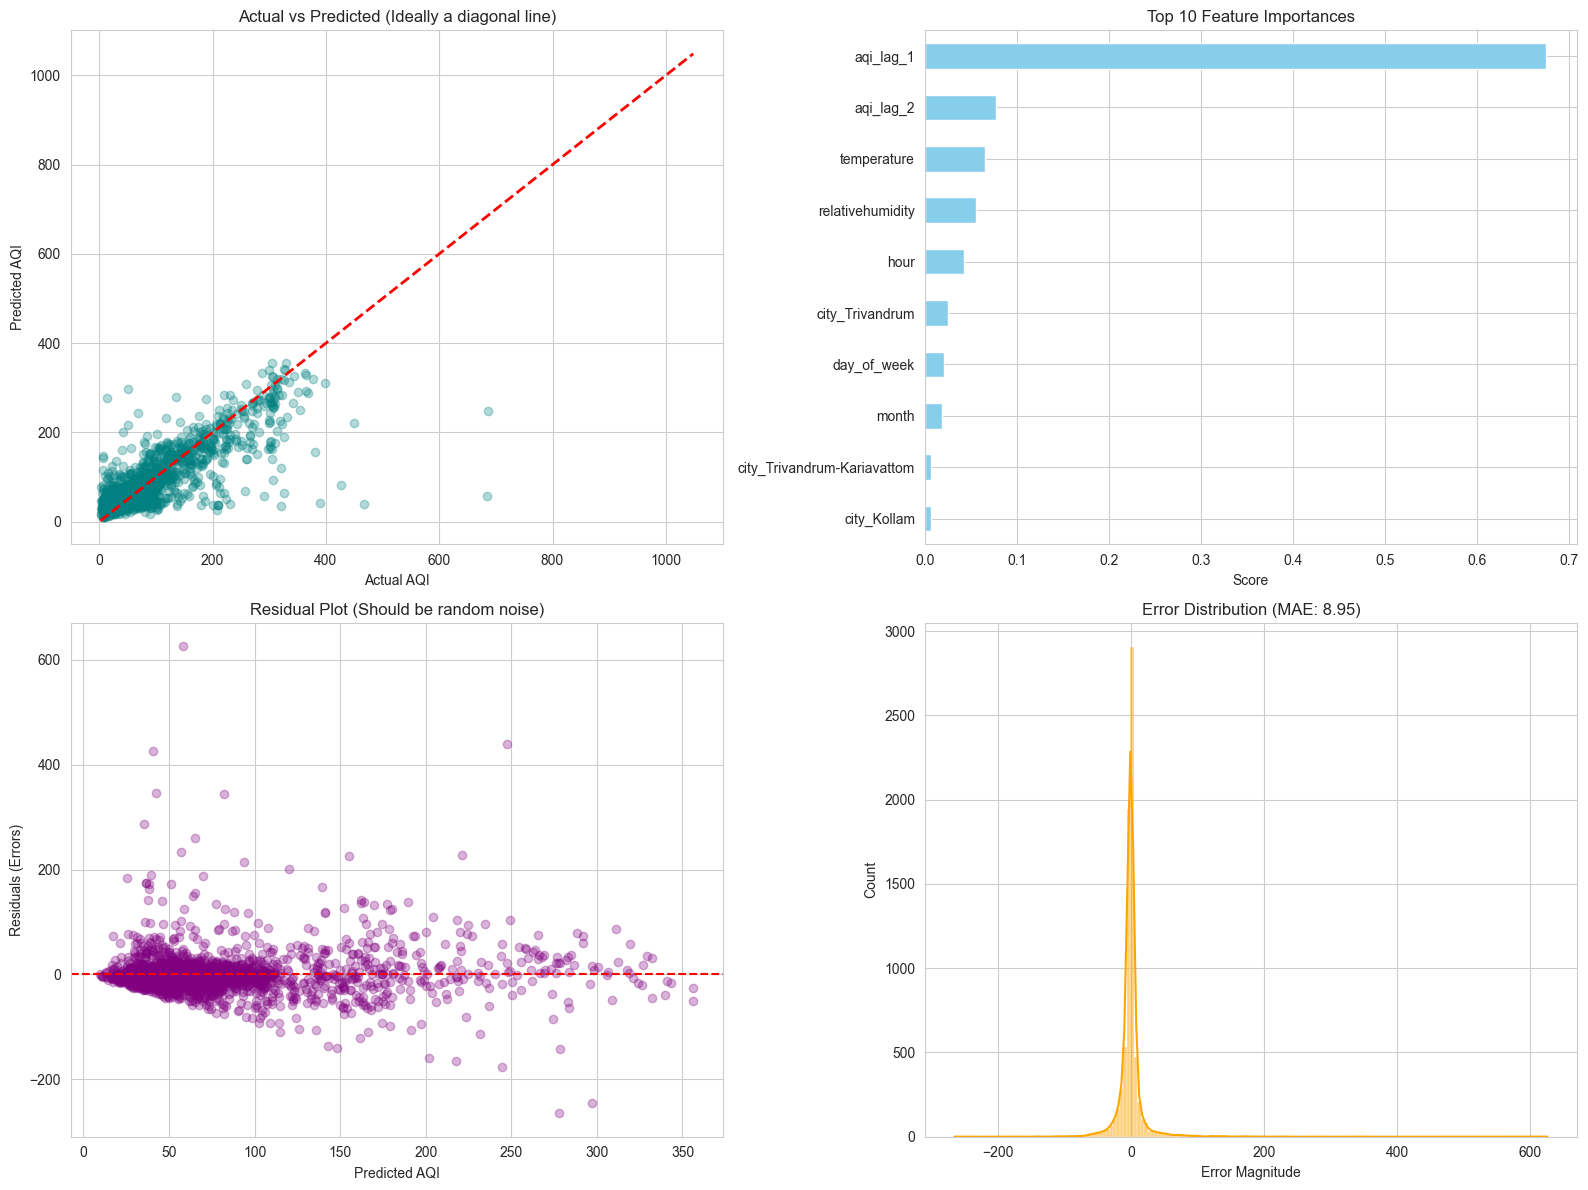

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1. LOAD AND PREPARE DATA
df = pd.read_csv('kerala_aqi_training_ready.csv')
df_model = pd.get_dummies(df, columns=['city'])

features = ['hour', 'day_of_week', 'month', 'aqi_lag_1', 'aqi_lag_2', 'temperature', 'relativehumidity']
city_cols = [col for col in df_model.columns if 'city_' in col]
X = df_model[features + city_cols]
y = df_model['target_next_hour_aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. TRAIN MODEL
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# 3. VISUALIZATION
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

# Plot 1: Actual vs Predicted
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted (Ideally a diagonal line)')

# Plot 2: Feature Importance
plt.subplot(2, 2, 2)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
importances.tail(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Score')

# Plot 3: Residual Plot (Error vs Prediction)
plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuals, alpha=0.3, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Plot (Should be random noise)')

# Plot 4: Error Distribution
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True, color='orange')
plt.title(f'Error Distribution (MAE: {mean_absolute_error(y_test, y_pred):.2f})')
plt.xlabel('Error Magnitude')

plt.tight_layout()
plt.show()

C:\Users\Fahad\AppData\Local\Temp\ipykernel_28756\327697975.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='City', data=stats_df, palette='viridis')
C:\Users\Fahad\AppData\Local\Temp\ipykernel_28756\327697975.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='City', data=stats_df.sort_values('R2 Score', ascending=False), palette='magma')


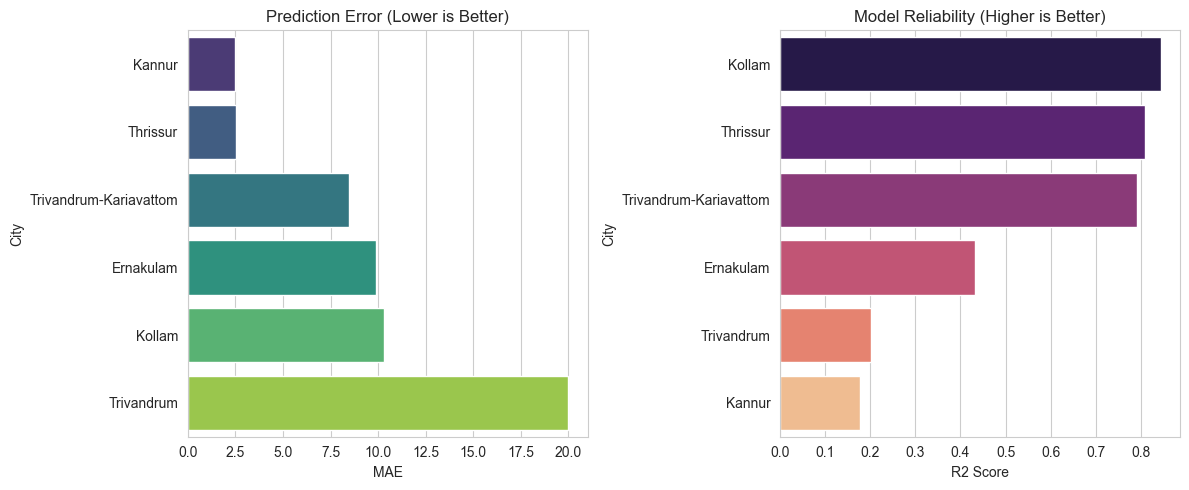

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load data and prepare features
df = pd.read_csv('kerala_aqi_training_ready.csv')
df_model = pd.get_dummies(df, columns=['city'])

features = ['hour', 'day_of_week', 'month', 'aqi_lag_1', 'aqi_lag_2', 'temperature', 'relativehumidity']
city_cols = [col for col in df_model.columns if 'city_' in col]
X = df_model[features + city_cols]
y = df_model['target_next_hour_aqi']

# Split data while keeping track of indices to map back to city names
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42
)

# 2. Train and Predict
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Create results dataframe
results = pd.DataFrame({
    'city': df.loc[idx_test, 'city'],
    'actual': y_test,
    'predicted': y_pred
})

# 4. Calculate metrics per city
city_stats = []
for city, group in results.groupby('city'):
    city_stats.append({
        'City': city,
        'MAE': mean_absolute_error(group['actual'], group['predicted']),
        'R2 Score': r2_score(group['actual'], group['predicted'])
    })

stats_df = pd.DataFrame(city_stats).sort_values('MAE')

# 5. Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='MAE', y='City', data=stats_df, palette='viridis')
plt.title('Prediction Error (Lower is Better)')

plt.subplot(1, 2, 2)
sns.barplot(x='R2 Score', y='City', data=stats_df.sort_values('R2 Score', ascending=False), palette='magma')
plt.title('Model Reliability (Higher is Better)')

plt.tight_layout()
plt.show()

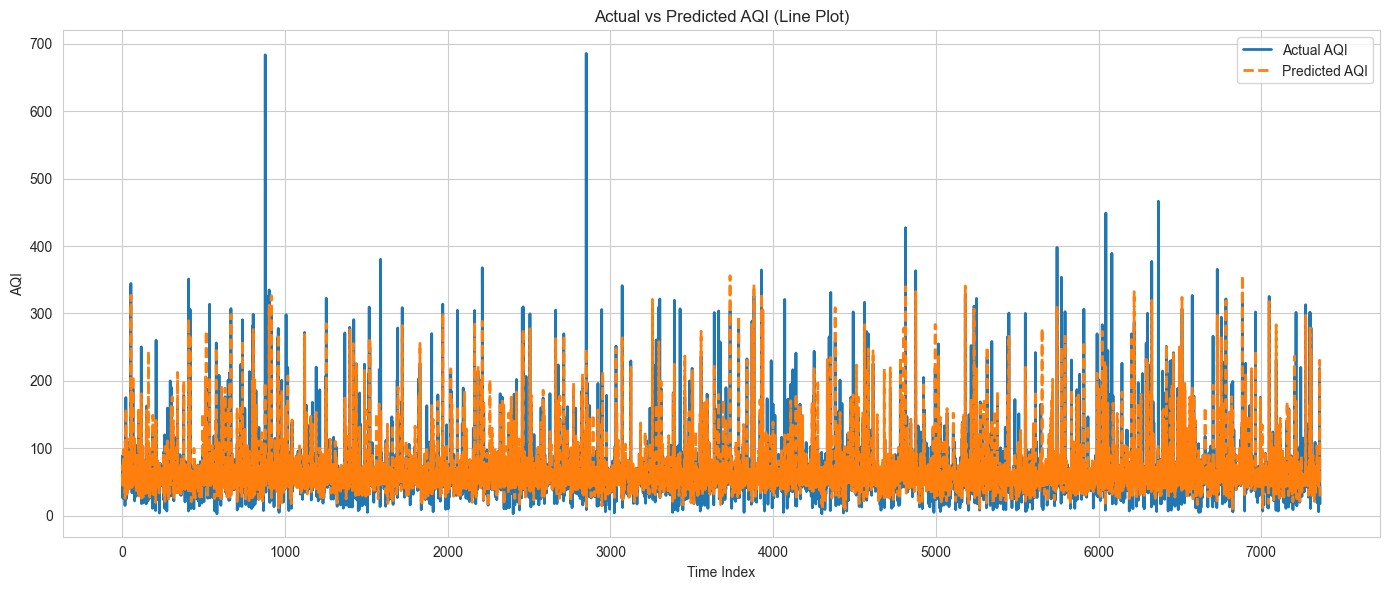

In [12]:
plt.figure(figsize=(14,6))

plt.plot(y_test.values, label="Actual AQI", linewidth=2)
plt.plot(y_pred, label="Predicted AQI", linewidth=2, linestyle="--")

plt.xlabel("Time Index")
plt.ylabel("AQI")
plt.title("Actual vs Predicted AQI (Line Plot)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()